In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

Функция для проверки стационарности временного ряда

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

Функция для визуализации временного ряда

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Original')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Загрузка данных из CSV файла (daily-total-female-births-in-cal.csv)

In [ ]:
data = pd.read_csv("daily-total-female-births-in-cal.csv", parse_dates=['Date'], index_col='Date')
series = data['Count']

Визуализация и проверка стационарности исходного ряда

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


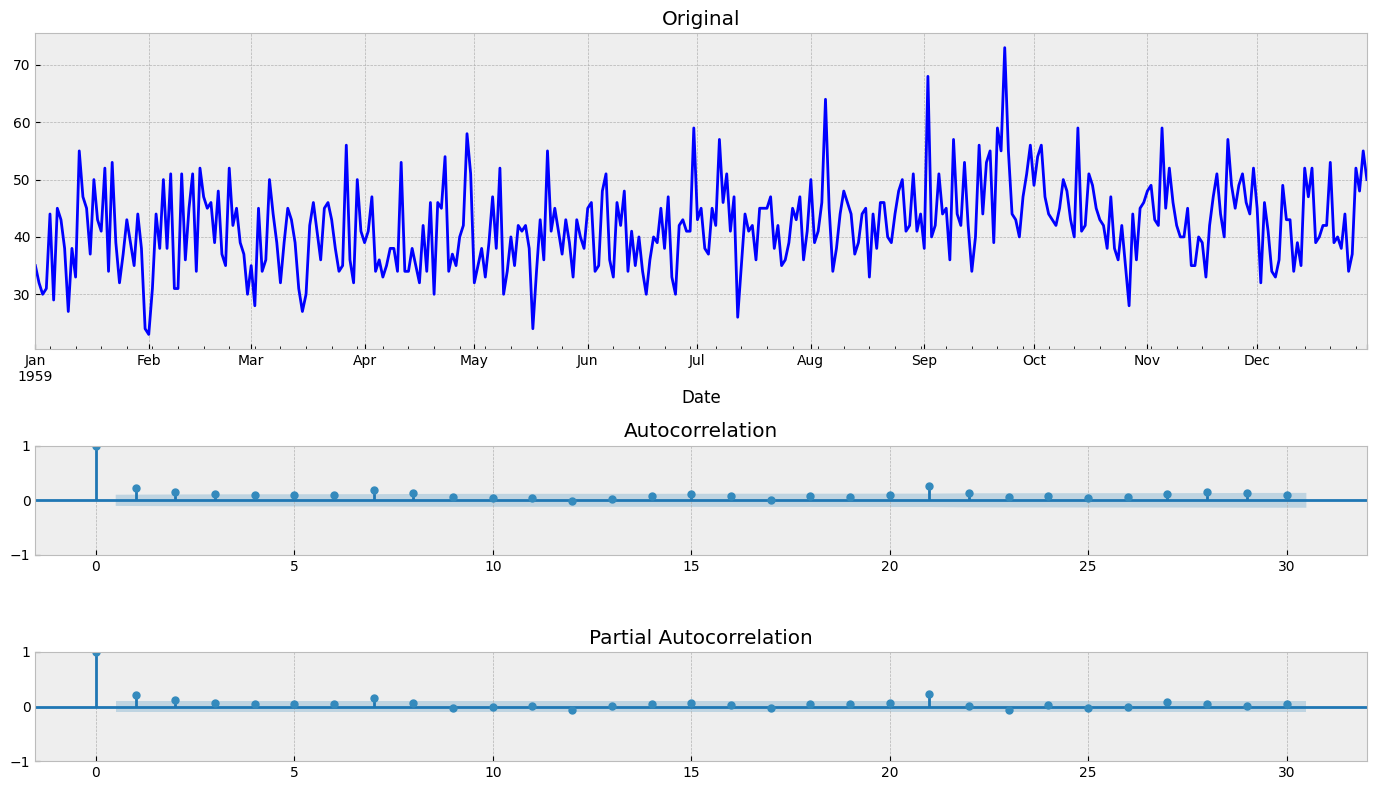

In [ ]:
tsplot(series, lags=30)

Применение первого дифференцирования

Results of Dickey-Fuller Test:
Test Statistic                -1.262518e+01
p-value                        1.547240e-23
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


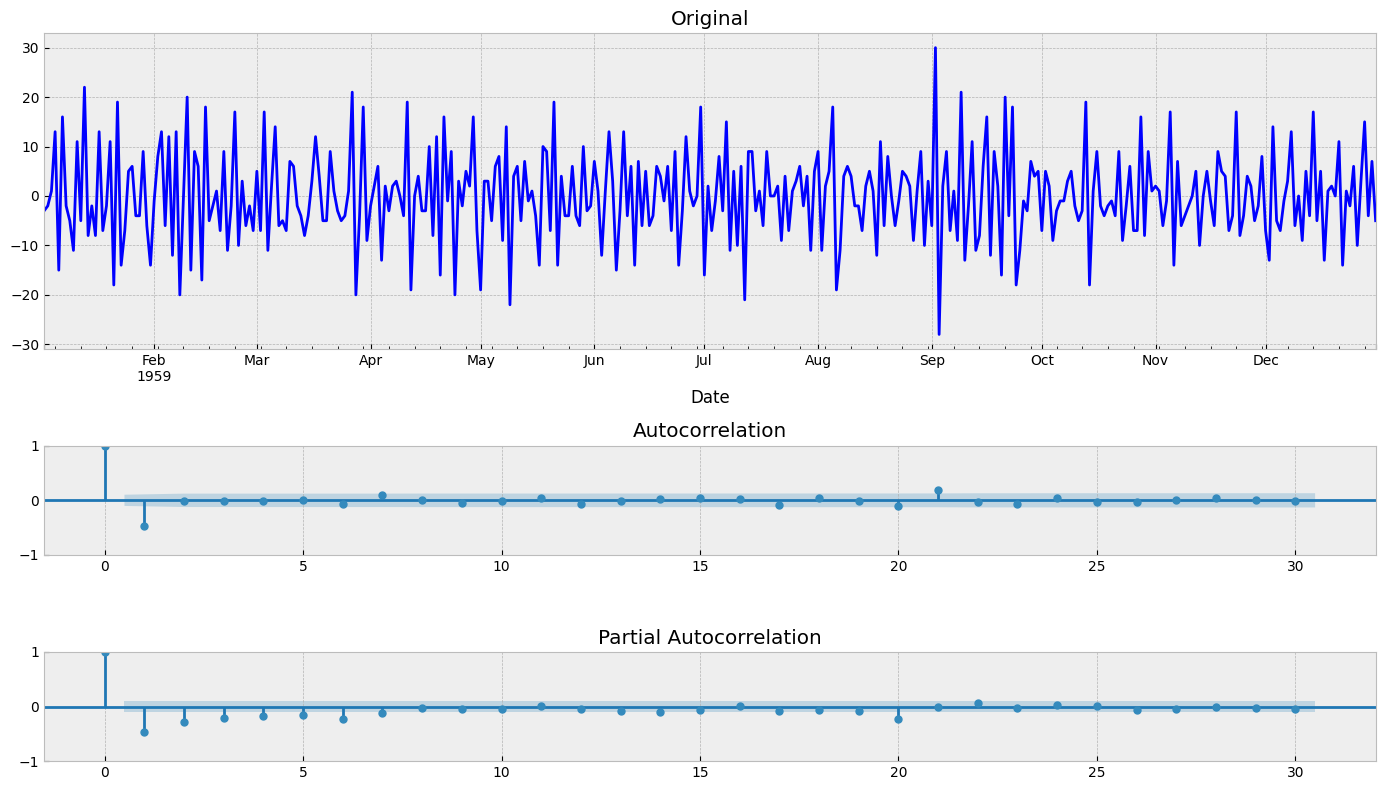

In [ ]:
series_diff = series.diff().dropna()
tsplot(series_diff, lags=30)

Преобразование Бокса-Кокса для стабилизации дисперсии

Results of Dickey-Fuller Test:
Test Statistic                  -4.344294
p-value                          0.000372
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


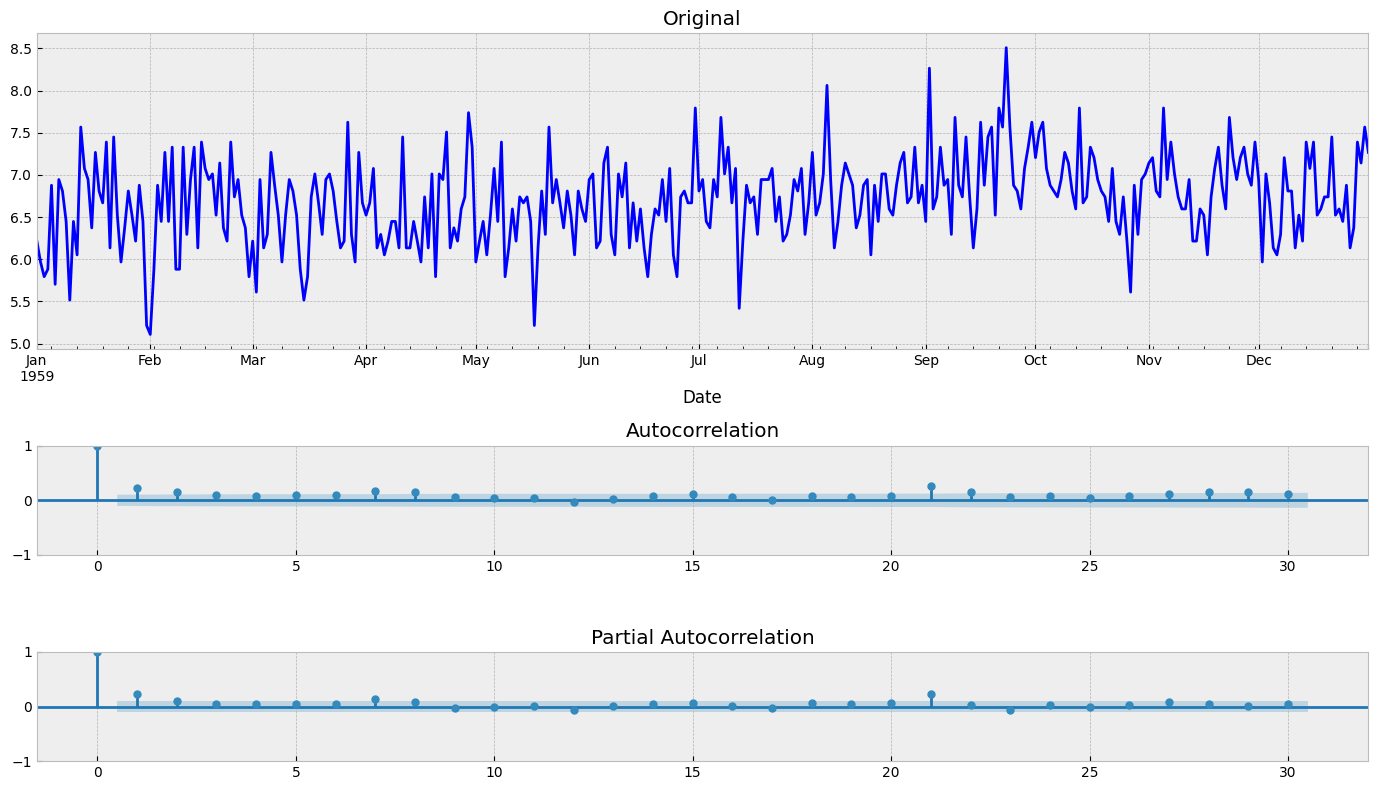

In [ ]:
series_bc, lam = boxcox(series)
series_bc = pd.Series(series_bc, index=series.index)
tsplot(series_bc, lags=30)

Дифференцирование после Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                -1.285895e+01
p-value                        5.159404e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


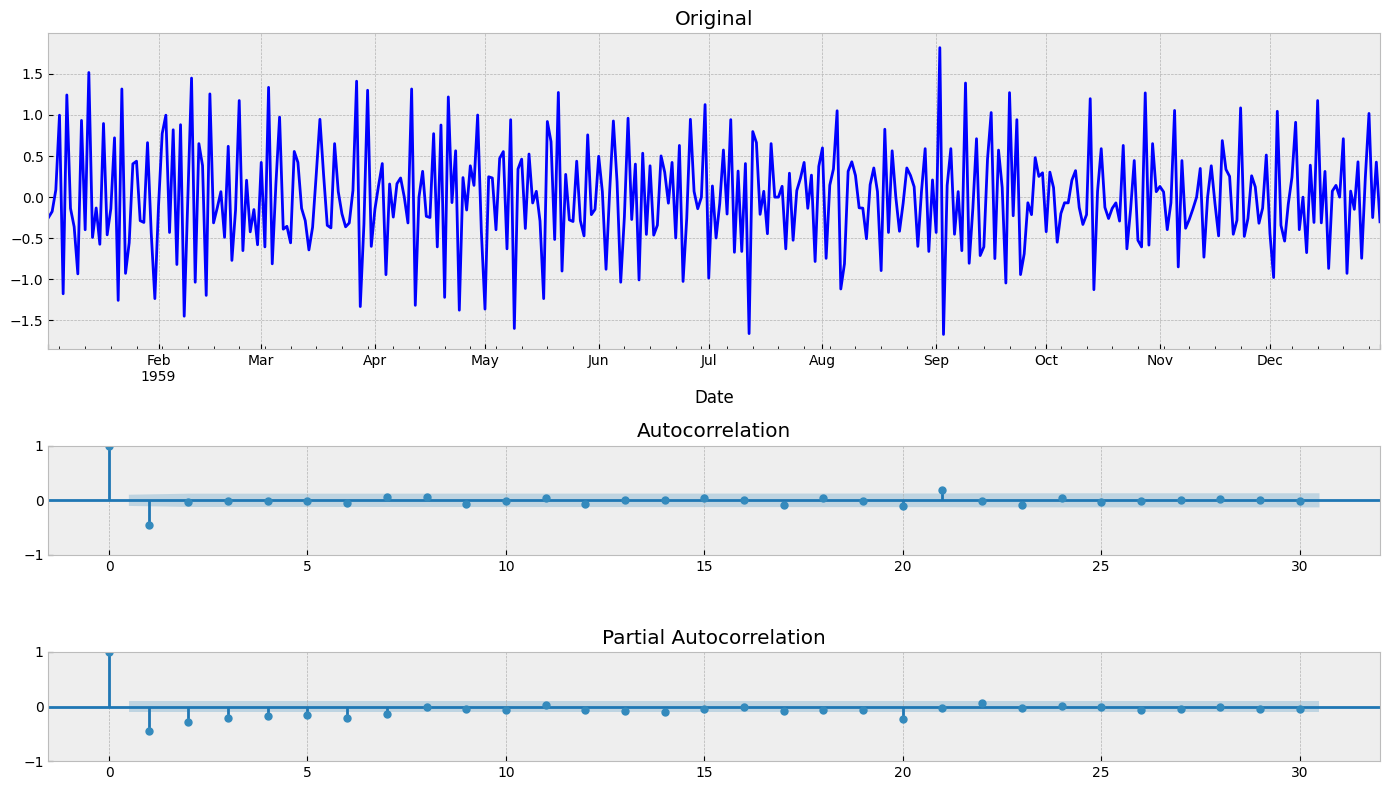

In [ ]:
series_bc_diff = series_bc.diff().dropna()
tsplot(series_bc_diff, lags=30)

Загрузка данных international-airline-passengers.csv

In [ ]:
df = pd.read_csv("international-airline-passengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

График временного ряда

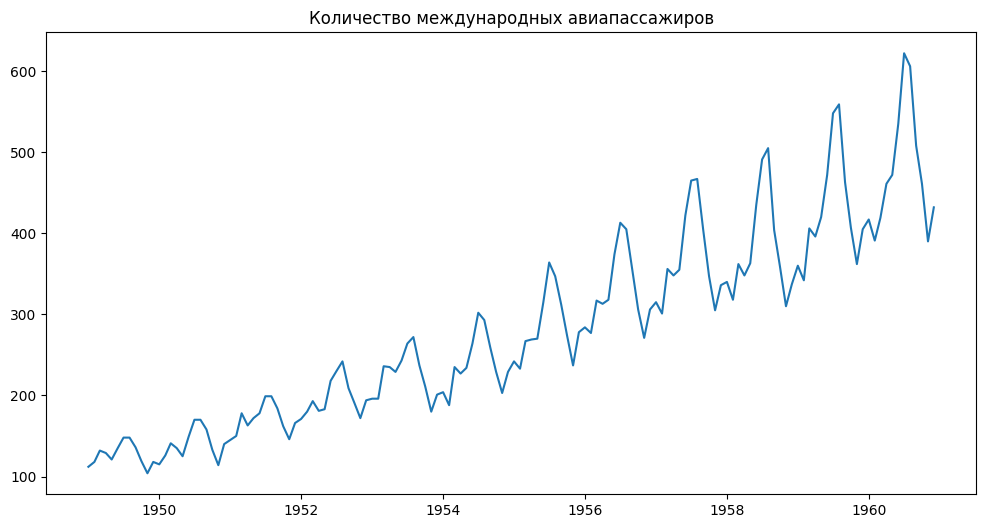

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Count'])
plt.title('Количество международных авиапассажиров')
plt.show()

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(df['Count'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Применение логарифмического преобразования

In [ ]:
df['Log_Count'] = np.log(df['Count'])

Дифференцирование

In [ ]:
df['Log_Count_First_Diff'] = df['Log_Count'] - df['Log_Count'].shift(1)

Убираем NaN

In [ ]:
df.dropna(inplace=True)

Визуализация

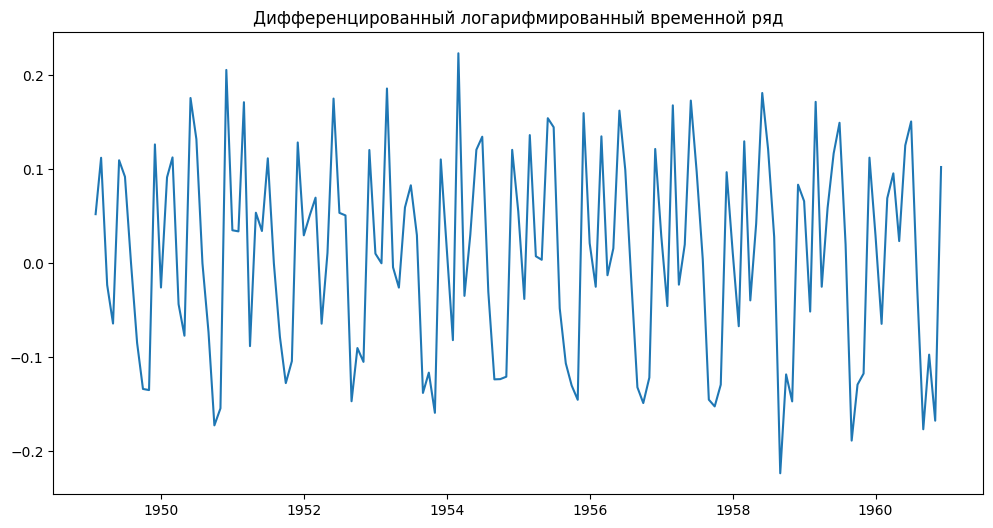

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Log_Count_First_Diff'])
plt.title('Дифференцированный логарифмированный временной ряд')
plt.show()

In [ ]:
test_stationarity(df['Log_Count_First_Diff'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


Подбор параметров модели ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


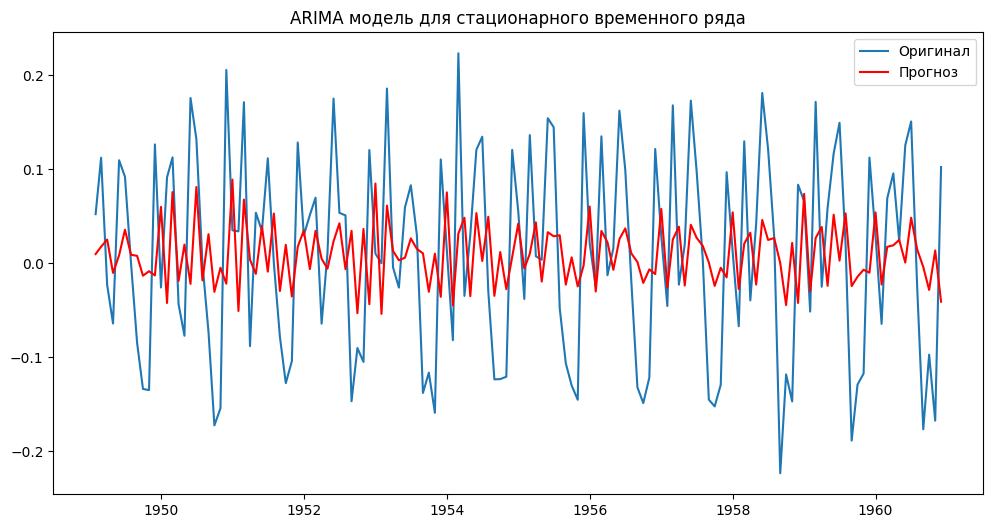

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Log_Count_First_Diff'], order=(1, 0, 1))
results_ARIMA = model.fit()

plt.figure(figsize=(12, 6))
plt.plot(df['Log_Count_First_Diff'], label='Оригинал')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Прогноз')
plt.title('ARIMA модель для стационарного временного ряда')
plt.legend()
plt.show()

Загрузка данных mean-monthly-air-temperature-deg.csv

In [ ]:
data = pd.read_csv('mean-monthly-air-temperature-deg.csv', parse_dates=['Month'], index_col='Month')

Визуализация исходного временного ряда

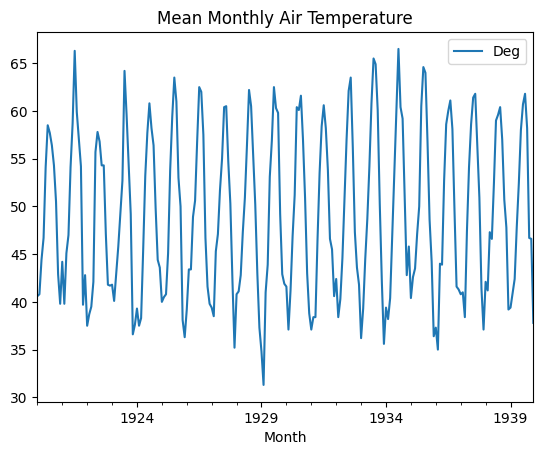

In [ ]:
data.plot(title='Mean Monthly Air Temperature')
plt.show()

Проверка стационарности с помощью теста Дики-Фуллера на исходных данных

In [ ]:
result = adfuller(data['Deg'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.255492
p-value: 0.016989


Детрендинг - вычитание скользящего среднего

In [ ]:
rolling_mean = data['Deg'].rolling(window=12).mean()
data_detrended = data['Deg'] - rolling_mean
data_detrended.dropna(inplace=True)


Визуализация детрендированного ряда

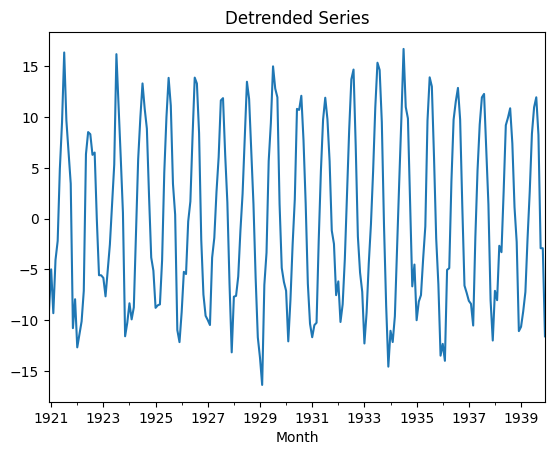

In [ ]:
data_detrended.plot(title='Detrended Series')
plt.show()

Проверка стационарности после детрендинга

In [ ]:
result = adfuller(data_detrended)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.531598
p-value: 0.000002


Вычитание сезонной компоненты

In [ ]:
decomposition = seasonal_decompose(data['Deg'], model='additive', period=12)
seasonal = decomposition.seasonal
data_deseasonalized = data['Deg'] - seasonal

Визуализация десезонированного ряда

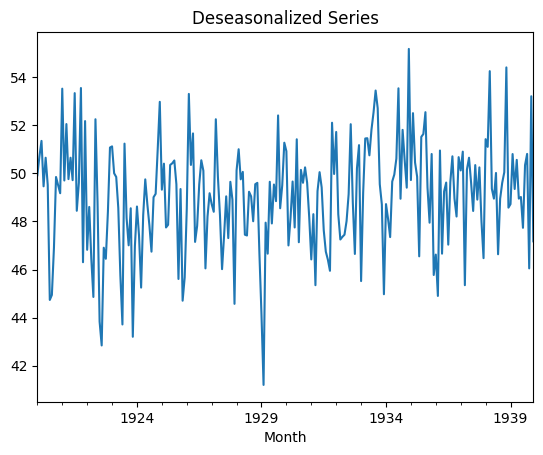

In [ ]:
data_deseasonalized.plot(title='Deseasonalized Series')
plt.show()


Проверка стационарности после десезонирования

In [ ]:
result = adfuller(data_deseasonalized.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.505817
p-value: 0.000000


Загрузка данных monthly-boston-armed-robberies-j.csv

In [ ]:
data = pd.read_csv("monthly-boston-armed-robberies-j.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

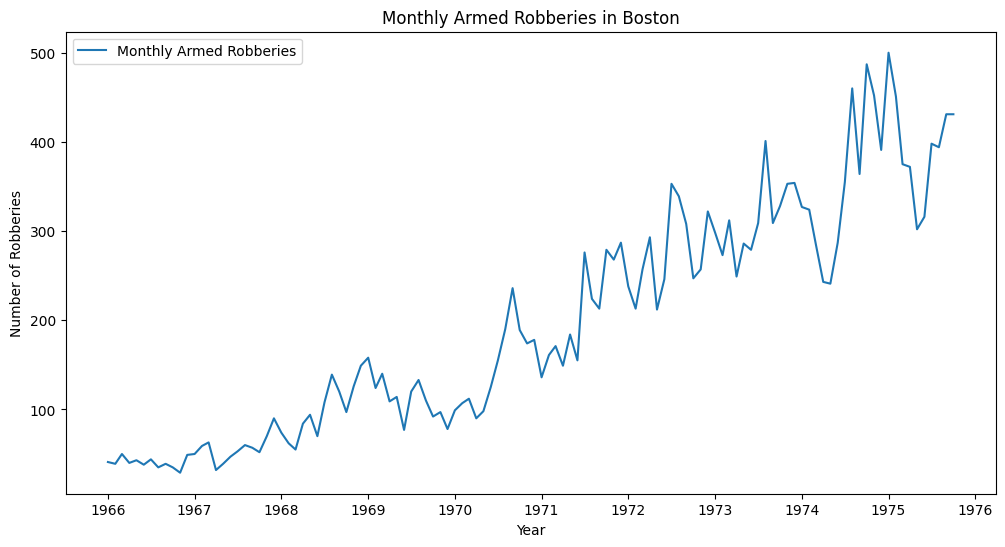

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Monthly Armed Robberies')
plt.title('Monthly Armed Robberies in Boston')
plt.xlabel('Year')
plt.ylabel('Number of Robberies')
plt.legend()

In [ ]:
result = adfuller(data['Count'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.001102140245781
p-value: 0.994277563805723
Critical Values:
   1%, -3.4936021509366793
Critical Values:
   5%, -2.8892174239808703
Critical Values:
   10%, -2.58153320754717


In [ ]:
data['LogCount'] = np.log(data['Count'])
data['LogCountDiff'] = data['LogCount'] - data['LogCount'].shift()
data.dropna(inplace=True)

Повторяем тест Дикки-Фуллера после преобразования

In [ ]:
result = adfuller(data['LogCountDiff'])
print('ADF Statistic after transformation:', result[0])
print('p-value:', result[1])

ADF Statistic after transformation: -7.601792127269042
p-value: 2.3786024417437596e-11


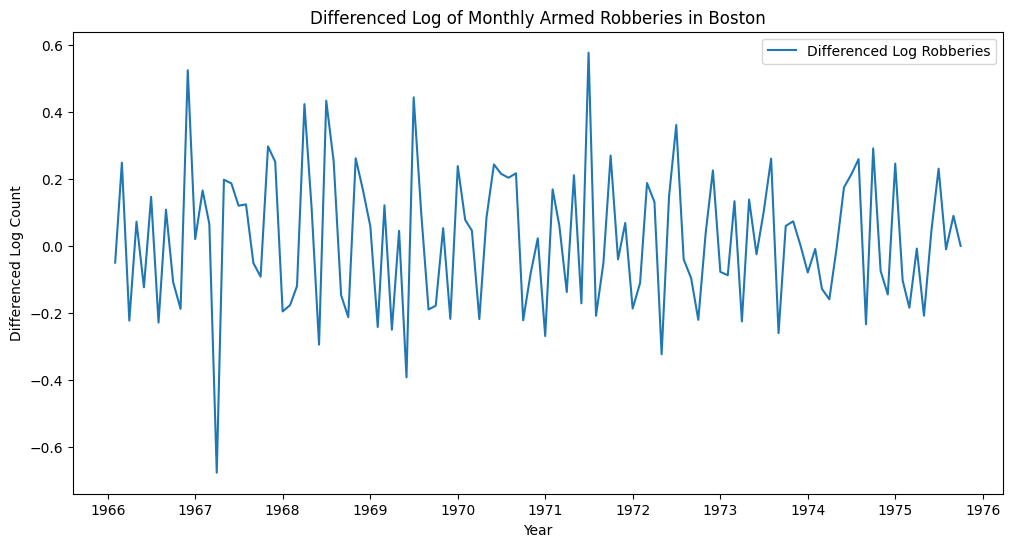

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['LogCountDiff'], label='Differenced Log Robberies')
plt.title('Differenced Log of Monthly Armed Robberies in Boston')
plt.xlabel('Year')
plt.ylabel('Differenced Log Count')
plt.legend()
plt.show()

Загрузка данных monthly-sales-of-company-x-jan-6.csv

In [ ]:
data = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
print(data.head())

            Count
Month            
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36


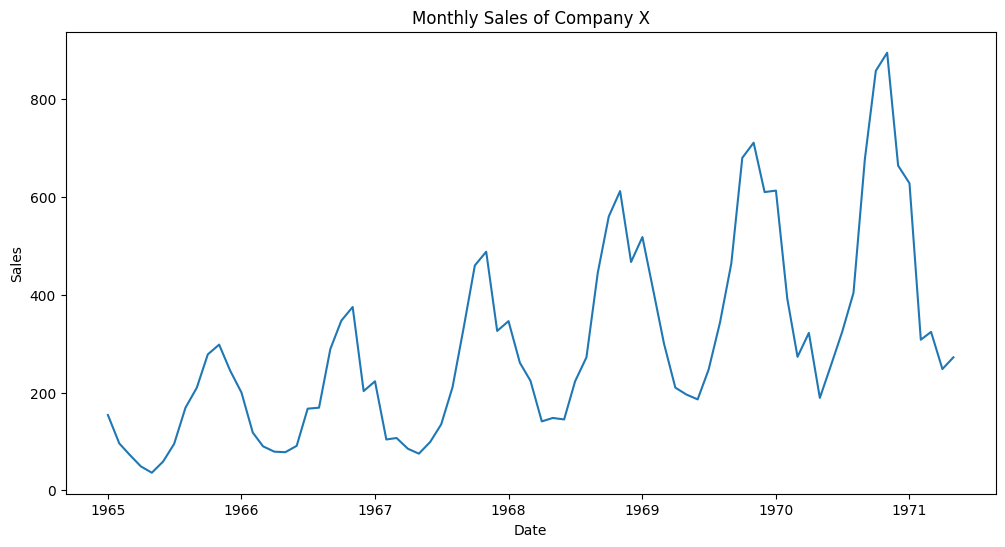

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Monthly Sales of Company X')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(data['Count'])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Применение логарифмического преобразования

In [ ]:
data['Log_Count'] = np.log(data['Count'])

Дифференцирование

In [ ]:
data['Diff_Log_Count'] = data['Log_Count'].diff()

Проверка на стационарность после преобразований

In [ ]:
data_diff = data['Diff_Log_Count'].dropna()
test_stationarity(data_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Загрузка данных weekly-closings-of-the-dowjones-.csv

In [ ]:
data = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
data.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


Преобразуем столбец в корректный формат даты

In [ ]:
import datetime as dt

def parse_weekly_to_date(year_week_str):
    year, week = map(int, year_week_str.split('-W'))
    return dt.datetime.strptime(f'{year} {week} 1', '%Y %W %w')

In [ ]:
data['Week'] = data['Week'].apply(parse_weekly_to_date)
data.set_index('Week', inplace=True)

Визуализация исходного ряда

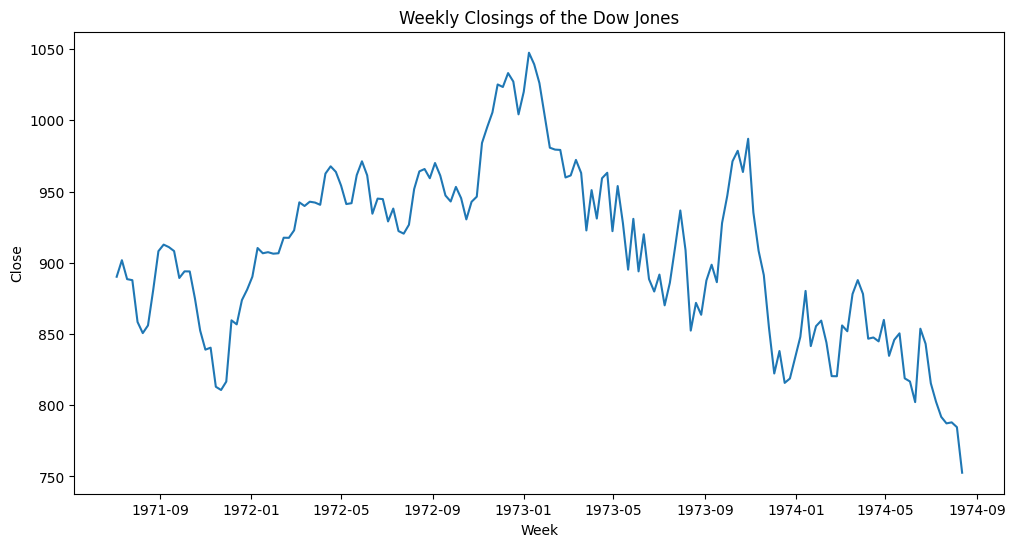

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Weekly Closings of the Dow Jones')
plt.xlabel('Week')
plt.ylabel('Close')
plt.show()

Вычисление скользящего среднего и стандартного отклонения

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(data['Close'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


Дифференцирование

In [ ]:
data_diff = data['Close'].diff().dropna()

Визуализация результата

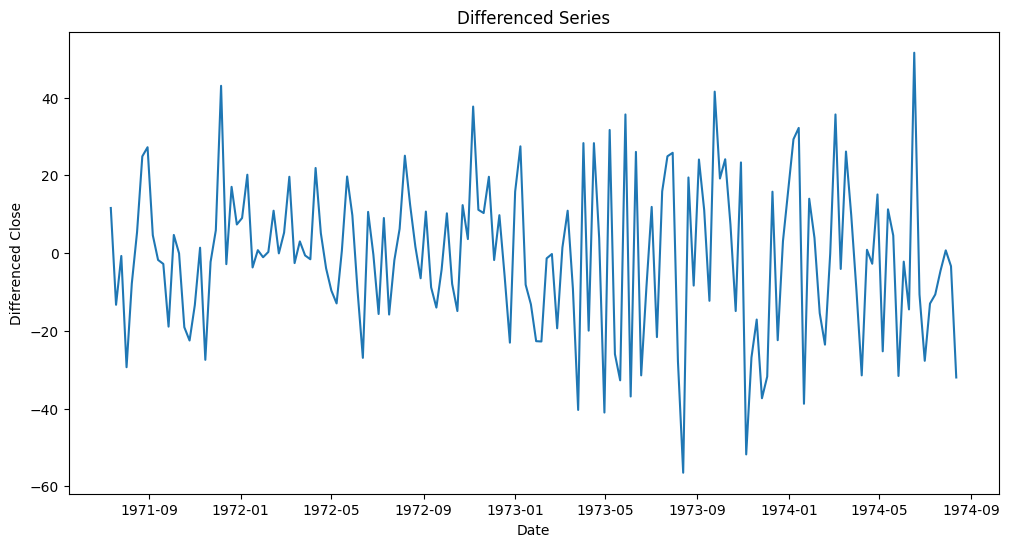

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_diff)
plt.title('Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Close')
plt.show()

Повторный тест Дики-Фуллера

In [ ]:
test_stationarity(data_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


Дифференцирование не достаточно, применим Box-Cox трансформацию

In [ ]:
data_transformed, lambda_bc = boxcox(data['Close'].dropna())

Дифференцирование после трансформации

In [ ]:
data_transformed_diff = np.diff(data_transformed)

Визуализация после трансформации и дифференцирования

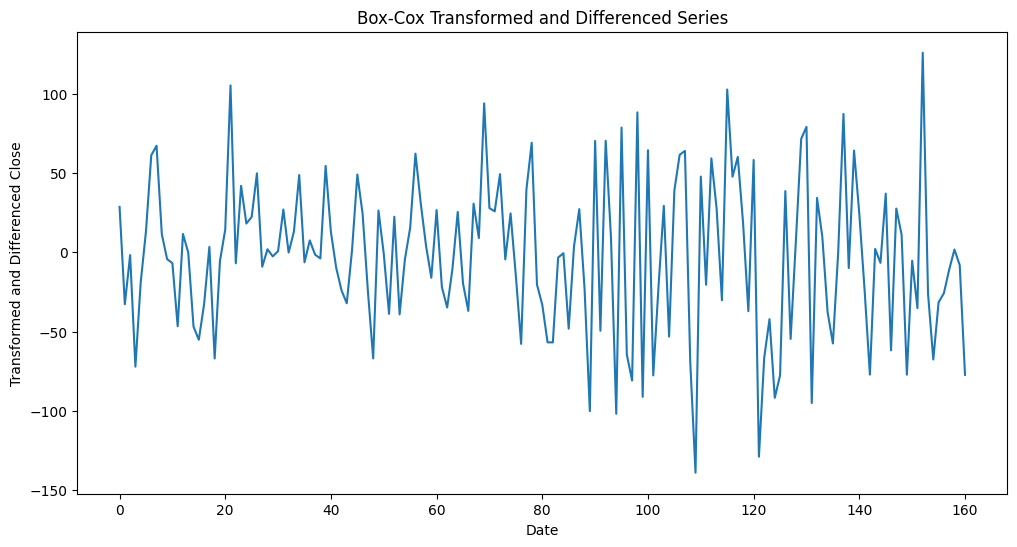

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_transformed_diff)
plt.title('Box-Cox Transformed and Differenced Series')
plt.xlabel('Date')
plt.ylabel('Transformed and Differenced Close')
plt.show()

Повторный тест Дики-Фуллера

In [ ]:
test_stationarity(data_transformed_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.302750e+01
p-value                        2.382691e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
